# Tesla Stock Price Prediction
In this project, we aim to predict the closing stock price (Close column) of Tesla. Stock price prediction is a challenging task as it depends on multiple factors like historical prices, market trends, and external influences.

We use Linear Regression, a fundamental machine learning algorithm, to model the relationship between various stock features and the closing price.

# Tesla Stock Price Prediction
In this project, we aim to predict the **closing stock price** (`Close` column) of Tesla...

## Key Steps in the Project
1. **Data Collection** - We use Tesla stock price data from a CSV file.  
2. **Feature Selection** - The main features used for prediction include:  
   - `Open` (Opening price of the stock)  
   - `High` and `Low` (Daily high and low prices)  
   - `Volume` (Number of shares traded)  
   - `MA_10` and `MA_50` (10-day and 50-day moving averages)  
   - `Prev_Close` (Previous day’s closing price)  
3. **Model Training** - We apply Linear Regression to learn patterns from past stock prices.

4. **Prediction & Evaluation** - The model is tested using unseen data, and we evaluate its accuracy using R² Score and RMSE.

5. **Visualization** - We plot the actual vs. predicted stock prices to assess model performance.




In [20]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Loading the Tesla Stock Dataset  
In this step, we load the Tesla stock price dataset to analyze historical stock trends and prepare it for machine learning.  
The dataset contains the following key columns:  

- `Date` → The trading date  
- `Open` → The stock price at market opening  
- `High` → The highest price of the day  
- `Low` → The lowest price of the day  
- `Close` → The stock price at market closing (our target variable)  
- `Adj Close` → Adjusted closing price considering splits/dividends  
- `Volume` → The number of shares traded  

We will use **Pandas** to load the dataset and perform initial data exploration.


In [21]:
df = pd.read_csv("Tesla.csv")

In [22]:
df.head(5)

,Date,Open,High,Low,Close,Volume,Adj Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001


In [23]:
# verify rows is there any NaN Values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1692 entries, 0 to 1691
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1692 non-null   object 
 1   Open       1692 non-null   float64
 2   High       1692 non-null   float64
 3   Low        1692 non-null   float64
 4   Close      1692 non-null   float64
 5   Volume     1692 non-null   int64  
 6   Adj Close  1692 non-null   float64
dtypes: float64(5), int64(1), object(1)
memory usage: 92.7+ KB


In [24]:
# describe data
df.describe()

,Open,High,Low,Close,Volume,Adj Close
count,1692.000000,1692.000000,1692.000000,1692.000000,1.692000e+03,1692.000000
mean,132.441572,134.769698,129.996223,132.428658,4.270741e+06,132.428658
std,94.309923,95.694914,92.855227,94.313187,4.295971e+06,94.313187
min,16.139999,16.629999,14.980000,15.800000,1.185000e+05,15.800000
25%,30.000000,30.650000,29.215000,29.884999,1.194350e+06,29.884999
50%,156.334999,162.370002,153.150002,158.160004,3.180700e+06,158.160004
75%,220.557495,224.099999,217.119999,220.022503,5.662100e+06,220.022503
max,287.670013,291.420013,280.399994,286.040009,3.716390e+07,286.040009


In [25]:
# remove Adj Close column
df.drop(columns=["Adj Close"])

,Date,Open,High,Low,Close,Volume
0,6/29/2010,19.000000,25.000000,17.540001,23.889999,18766300
1,6/30/2010,25.790001,30.420000,23.299999,23.830000,17187100
2,7/1/2010,25.000000,25.920000,20.270000,21.959999,8218800
3,7/2/2010,23.000000,23.100000,18.709999,19.200001,5139800
4,7/6/2010,20.000000,20.000000,15.830000,16.110001,6866900
...,...,...,...,...,...,...
1687,3/13/2017,244.820007,246.850006,242.779999,246.169998,3010700
1688,3/14/2017,246.110001,258.119995,246.020004,258.000000,7575500
1689,3/15/2017,257.000000,261.000000,254.270004,255.729996,4816600
1690,3/16/2017,262.399994,265.750000,259.059998,262.049988,7100400


## Data Preprocessing  
Before training our machine learning model, we need to preprocess the dataset to improve data quality and ensure better predictions. The key preprocessing steps include:  

1. **Removing Unnecessary Columns** - Dropping columns that are not useful for prediction, such as `Adj Close`.  
2. **Feature Engineering** - Creating new features like moving averages (`MA_10`, `MA_50`) to capture trends in stock prices.  
3. **Handling Missing Values** - Checking for and filling/removing missing values if needed.  
4. **Scaling Features (Optional)** - Standardizing numerical features for better model performance.  

The processed data will be used for training our regression model.


In [26]:
# Calaculate MA for 10 days
df['MA_10'] = df['Close'].rolling(window=10).mean()
# Calculate MA for 50 days
df["MA_50"] = df['Close'].rolling(window=50).mean()

In [27]:
df["MA_10"]

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
1687    248.349000
1688    249.150000
1689    249.720999
1690    250.877998
1691    251.870998
Name: MA_10, Length: 1692, dtype: float64

we see the in MA_10 column we have first 10 rows are NaN

In [28]:
df["Prev_Close"] = df['Close'].shift(1) # Yesterday's Close Price

In [29]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,MA_10,MA_50,Prev_Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,NaN,NaN,NaN
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,NaN,NaN,23.889999
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,NaN,NaN,23.830000
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,NaN,NaN,21.959999
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,NaN,NaN,19.200001


In [30]:
df.bfill(inplace=True)

In [31]:
df.head()

,Date,Open,High,Low,Close,Volume,Adj Close,MA_10,MA_50,Prev_Close
0,6/29/2010,19.000000,25.00,17.540001,23.889999,18766300,23.889999,19.084,19.8336,23.889999
1,6/30/2010,25.790001,30.42,23.299999,23.830000,17187100,23.830000,19.084,19.8336,23.889999
2,7/1/2010,25.000000,25.92,20.270000,21.959999,8218800,21.959999,19.084,19.8336,23.830000
3,7/2/2010,23.000000,23.10,18.709999,19.200001,5139800,19.200001,19.084,19.8336,21.959999
4,7/6/2010,20.000000,20.00,15.830000,16.110001,6866900,16.110001,19.084,19.8336,19.200001


## Correlation

In [32]:
corr_df = df.drop(columns=["Date"])
corr_matrix = corr_df.corr(method="pearson")
corr_matrix

,Open,High,Low,Close,Volume,Adj Close,MA_10,MA_50,Prev_Close
Open,1.000000,0.999623,0.999605,0.999233,0.407515,0.999233,0.997359,0.981995,0.999577
High,0.999623,1.000000,0.999521,0.999691,0.416466,0.999691,0.997243,0.981982,0.999322
Low,0.999605,0.999521,1.000000,0.999656,0.397615,0.999656,0.996967,0.981532,0.999230
Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000,0.996905,0.981604,0.998917
Volume,0.407515,0.416466,0.397615,0.406907,1.000000,0.406907,0.400636,0.374738,0.406081
Adj Close,0.999233,0.999691,0.999656,1.000000,0.406907,1.000000,0.996905,0.981604,0.998917
MA_10,0.997359,0.997243,0.996967,0.996905,0.400636,0.996905,1.000000,0.987648,0.997767
MA_50,0.981995,0.981982,0.981532,0.981604,0.374738,0.981604,0.987648,1.000000,0.982645
Prev_Close,0.999577,0.999322,0.999230,0.998917,0.406081,0.998917,0.997767,0.982645,1.000000


In [33]:
corr_matrix['Close'].sort_values(ascending=False)

Close         1.000000
Adj Close     1.000000
High          0.999691
Low           0.999656
Open          0.999233
Prev_Close    0.998917
MA_10         0.996905
MA_50         0.981604
Volume        0.406907
Name: Close, dtype: float64

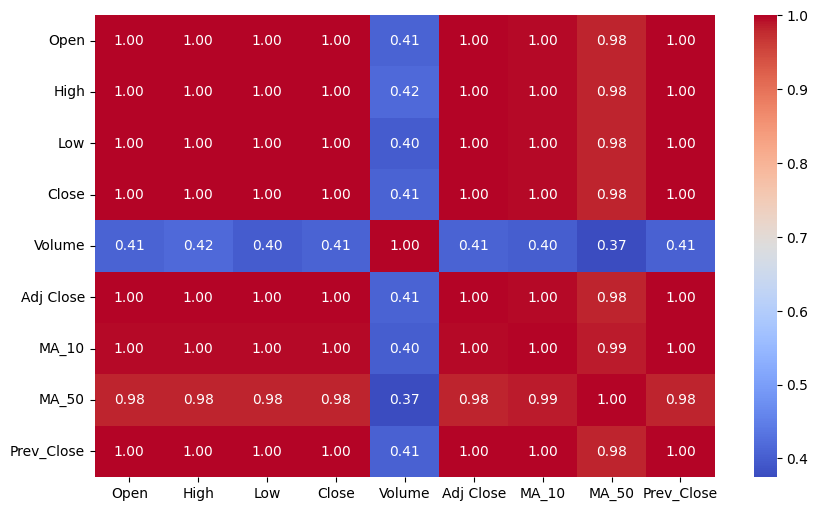

In [34]:
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.show()

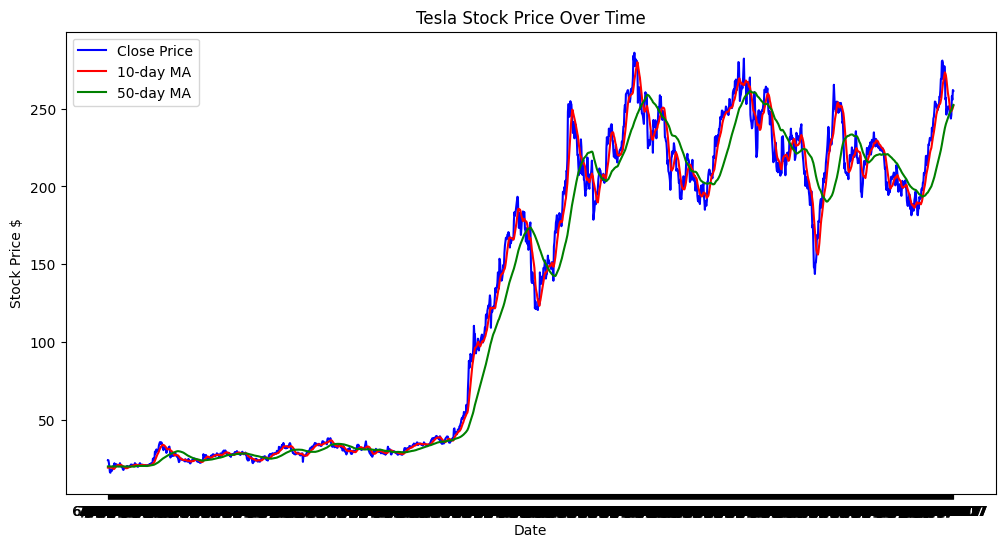

In [35]:
plt.figure(figsize=(12, 6))
plt.plot(df['Date'], df['Close'], label="Close Price", color="blue")
plt.plot(df['Date'], df['MA_10'], label="10-day MA", color="red")
plt.plot(df['Date'], df['MA_50'], label="50-day MA", color="green")
plt.xlabel("Date")
plt.ylabel("Stock Price $")
plt.title("Tesla Stock Price Over Time")
plt.legend()
plt.show()

## Model

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


features = ["Open", "High", "Low", "Volume", "MA_10", "MA_50", "Prev_Close"]
target = "Close"

X = df[features]
y = df[target]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [39]:
score = model.score(X_test, y_test)

In [40]:
score

0.9997919827452303

## Checking for Overfitting  
To determine if our model is overfitting, we compare the performance on the training and test datasets using:  
- **R² Score (Coefficient of Determination)** - Measures how well the model fits the data.  
- **RMSE (Root Mean Squared Error)** - Measures the error between actual and predicted values.  

If the training accuracy is significantly higher than the test accuracy, the model may be overfitting.


In [41]:
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np


# Prediction on raw Data
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)


# Calculate R2 Scores
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("Train R² Score:", train_r2)
print("Test R² Score:", test_r2)

# Optionally, calculate RMSE (Root Mean Squared Error)
train_rmse = np.sqrt(mean_squared_error(y_train, y_train_pred))
test_rmse = np.sqrt(mean_squared_error(y_test, y_test_pred))

print("Train RMSE:", train_rmse)
print("Test RMSE:", test_rmse)







Train R² Score: 0.9997444576066079
Test R² Score: 0.9997919827452303
Train RMSE: 1.4966350581677375
Test RMSE: 1.3928191717843874


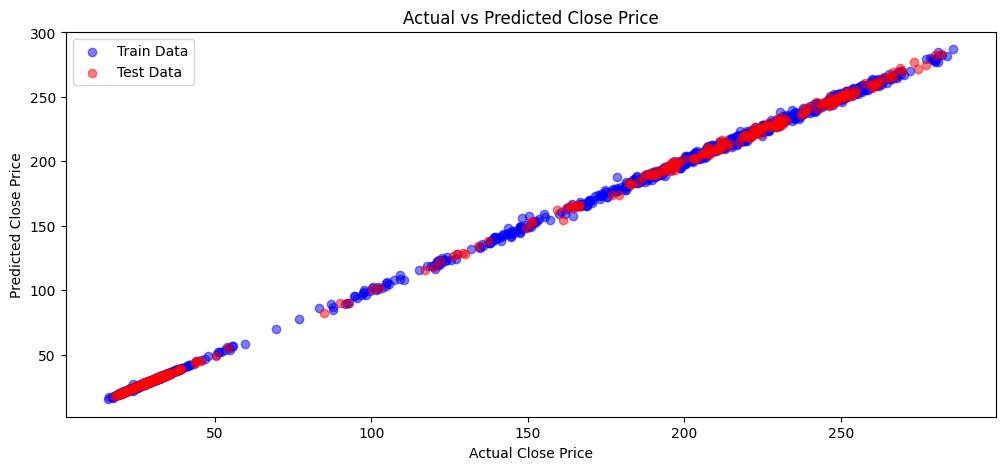

In [42]:
# Plot Training data
plt.figure(figsize=(12, 5))
plt.scatter(y_train, y_train_pred, color="blue", label="Train Data", alpha=0.5)
plt.scatter(y_test, y_test_pred, color="red", label="Test Data", alpha=0.5)

plt.xlabel("Actual Close Price")
plt.ylabel("Predicted Close Price")
plt.title("Actual vs Predicted Close Price")
plt.legend()
plt.show()

## Model Coefficients and Intercept  
In a Linear Regression model, the equation for prediction is:  

\[
\hat{y} = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + ... + \beta_n X_n
\]

Where:  
- **\(\beta_0\) (Intercept)** → The model’s baseline prediction when all features are 0.  
- **\(\beta_1, \beta_2, ..., \beta_n\) (Coefficients)** → The weights assigned to each feature, indicating their importance in predicting the target variable.  

By printing these values, we can understand how much each feature contributes to the predicted stock price.


In [43]:
model.coef_

array([-4.80881065e-01,  8.19504576e-01,  6.97181562e-01, -3.57942382e-08,
        2.59230851e-02, -2.36329879e-03, -6.00396036e-02])

In [44]:
model.intercept_

np.float64(0.023830188222746074)